In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
# import AllTogether as t
import seaborn as sns
%matplotlib inline

df_lis_boston = pd.read_csv('./data_set/boston_listings.csv')
df_cal_boston = pd.read_csv('./data_set/boston_calendar.csv')
df_rev_boston = pd.read_csv('./data_set/boston_reviews.csv')

df_lis_seattle = pd.read_csv('./data_set/seattle_listings.csv')
df_cal_seattle = pd.read_csv('./data_set/seattle_calendar.csv')
df_rev_seattle = pd.read_csv('./data_set/seattle_reviews.csv')


In [190]:
import datetime as dt

In [22]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None


In [91]:
df_lis_boston.isna().mean().sort_values(ascending=False)

neighbourhood_group_cleansed        1.000000
jurisdiction_names                  1.000000
license                             1.000000
has_availability                    1.000000
square_feet                         0.984379
monthly_price                       0.752301
weekly_price                        0.751185
security_deposit                    0.625662
notes                               0.550907
interaction                         0.433473
access                              0.415342
neighborhood_overview               0.394700
host_about                          0.365132
transit                             0.359833
house_rules                         0.332497
cleaning_fee                        0.308787
space                               0.294840
review_scores_accuracy              0.229568
review_scores_location              0.229289
review_scores_value                 0.229010
review_scores_checkin               0.228731
review_scores_cleanliness           0.228173
review_sco

In [92]:
df_lis_seattle.isna().mean().sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [93]:
df_cal_boston.isna().mean().sort_values(ascending=False)

price         0.508716
available     0.000000
date          0.000000
listing_id    0.000000
dtype: float64

In [94]:
df_cal_seattle.isna().mean().sort_values(ascending=False)

price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

In [99]:
#Check whether all null price is not available
df_cal_seattle[~df_cal_seattle['price'].isna()]['available'].unique()

array(['t'], dtype=object)

In [102]:
df_rev_boston.isna().mean().sort_values(ascending=False)

comments         0.000776
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

In [101]:
df_rev_seattle.isna().mean().sort_values(ascending=False)

comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

## Business Question:
1. How's the Availability Rate & Number of Unit Between Two Cities Throughout the year? Segment Monthly/Weekly
2. What impacting the Rates in Each City? [include months as cat_variable]
3. Availability in Rate between Area

In [105]:
df_cal_boston['month']=df_cal_boston['date'].map(lambda x: x[:7])

In [109]:
#create boolean availability
df_cal_boston['available_bol'] = df_cal_boston['available'].map(lambda x: x=='t')

In [106]:
df_cal_seattle['month']=df_cal_seattle['date'].map(lambda x: x[:7])

In [110]:
df_cal_seattle['available_bol'] = df_cal_seattle['available'].map(lambda x: x=='t')

In [ ]:
df_merge1[df_merge1['smart_location']=='Boston, MA'].groupby('month')['test'].mean()

In [112]:
## Check Boston Monthly Roomnight Availbility Rate & Numbers 
boston_monthly_availability_rate=df_cal_boston.groupby('month')['available_bol'].mean()
boston_monthly_availability_n=df_cal_boston.groupby('month')['available_bol'].sum()

In [113]:
## Check Seattle Monthly Roomnight Availbility Rate & Numbers 
seattle_monthly_availability_rate=df_cal_seattle.groupby('month')['available_bol'].mean()
seattle_monthly_availability_n=df_cal_seattle.groupby('month')['available_bol'].sum()

In [120]:
print('Overall Availability Rates Boston','%.2f' %df_cal_boston['available_bol'].mean())
print('Overall Availability Rates Seattle','%.2f' %df_cal_seattle['available_bol'].mean())

Overall Availability Rates Boston 0.49
Overall Availability Rates Seattle 0.67


In [ ]:
# in General Seattle is More Available compare to Boston

In [59]:
## Compare Availability Rates Boston & Seattle by Monthly

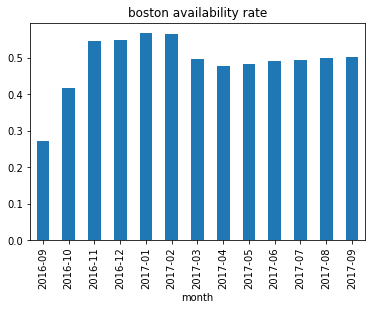

In [114]:
(boston_monthly_availability_rate).plot(kind="bar");
plt.title("boston availability rate");

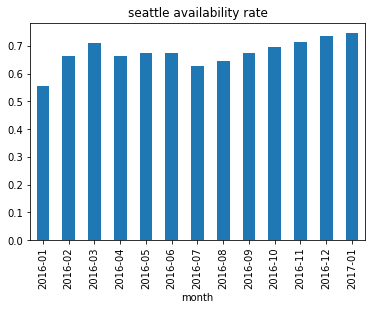

In [121]:
(seattle_monthly_availability_rate).plot(kind="bar");
plt.title("seattle availability rate");

In [64]:
# Shows that in Boston the availability drop in September & May (Ignore the Sep2017 as the data is incomplete); 
# I hypothesis that September is the starting of School term, which many students and parent look for a room to stay
# While in May is usually the Graduation date, where family usually come to boston to attend the graduation

# While in Seattle the Occupancy rate drop in January and July. 
# The possible hypothesis is that the availability drop in January because of new yer eve
# While in July is the 4th of July festive


In [125]:
boston_monthly_roomnight=df_cal_boston.groupby('month')['available_bol'].count()

In [126]:
seattle_monthly_roomnight=df_cal_seattle.groupby('month')['available_bol'].count()

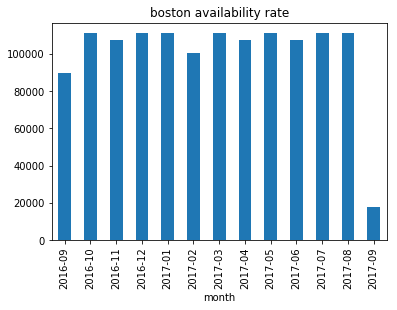

In [127]:
(boston_monthly_roomnight).plot(kind="bar");
plt.title("boston total roomnight");

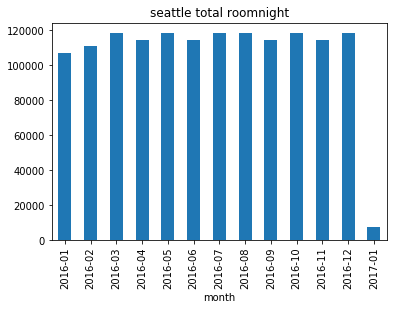

In [129]:
(seattle_monthly_roomnight).plot(kind="bar");
plt.title("seattle total roomnight");

In [ ]:
#Create Price regression model

In [135]:
df_cal_boston.head()

,listing_id,date,available,price,month,available_bol
0,12147973,2017-09-05,f,NaN,2017-09,False
1,12147973,2017-09-04,f,NaN,2017-09,False
2,12147973,2017-09-03,f,NaN,2017-09,False
3,12147973,2017-09-02,f,NaN,2017-09,False
4,12147973,2017-09-01,f,NaN,2017-09,False


In [149]:
df_cal_boston['price_float']=df_cal_boston['price'].replace('[\$,]', '', regex=True).astype(float)

In [169]:
df_avg_price_boston=df_cal_boston.groupby(['month','listing_id'])['price_float'].mean().reset_index()

In [172]:
df_avg_price_boston=df_avg_price_boston.rename(columns={"price_float": "price_float_m_avg"})

In [174]:
df_cal_boston = df_cal_boston.merge(df_avg_price_boston, left_on=['listing_id','month'], right_on=['listing_id','month'])

In [177]:
df_cal_boston['price_float']=df_cal_boston['price_float'].fillna(df_cal_boston['price_float_m_avg'])

In [180]:
df_cal_boston['price_float_is_na']=df_cal_boston['price_float'].isna()

In [183]:
df_cal_boston.groupby(['month','listing_id'])['price_float_is_na'].mean().reset_index().groupby(['month','price_float_is_na']).count().reset_index()

,month,price_float_is_na,listing_id
0,2016-09,False,2106
1,2016-09,True,1479
2,2016-10,False,2268
3,2016-10,True,1317
4,2016-11,False,2363
5,2016-11,True,1222
6,2016-12,False,2421
7,2016-12,True,1164
8,2017-01,False,2134
9,2017-01,True,1451


In [188]:
df_cal_boston=df_cal_boston.dropna(axis='index',subset=['price_float'])

In [192]:
df_cal_boston['date'] = pd.to_datetime(df_cal_boston['date'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [195]:
df_cal_boston['date_int']=df_cal_boston['date'].map(dt.datetime.toordinal)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [203]:
df_cal_boston=df_cal_boston.merge(df_cal_boston.groupby(['listing_id','month'])['available_bol'].mean().reset_index(),left_on=['listing_id','month'],right_on=['listing_id','month'])

In [206]:
df_cal_boston = df_cal_boston.rename(columns={'available_bol_y': 'monthly_availability_rate'})


In [211]:
df_boston_combine = df_cal_boston.merge(df_lis_boston,left_on='listing_id', right_on='id')

In [312]:
y=df_boston_combine['price_float']

In [271]:
y=pd.DataFrame
X=pd.DataFrame

In [272]:
X=df_boston_combine[df_boston_combine.columns[df_boston_combine.columns!='price_float']]

In [273]:
X.shape

(741194, 105)

In [274]:
X=X.dropna(how='all',axis='columns')

In [275]:
X.shape

(741194, 101)

In [276]:
X.head()

,listing_id,date,available,price_x,month,available_bol_x,price_float_m_avg,price_float_is_na,date_int,monthly_availability_rate,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price_y,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3075044,2017-08-22,t,$65.00,2017-08,True,67.580645,False,736563,1.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,t,moderate,f,f,1,1.3
1,3075044,2017-08-21,t,$65.00,2017-08,True,67.580645,False,736562,1.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massa

In [277]:
X[['price_y','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']]=X[['price_y','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']].replace('[\$,]', '', regex=True).astype(float)

In [278]:
X = X.drop(columns=['price_x','price_float_m_avg','price_float_is_na','price_y'])

In [279]:
X_cat_col = X.select_dtypes(include='object').columns
X_num_col = X.select_dtypes(exclude='object').columns

In [280]:
X[X_num_col] = X[X_num_col].fillna(X[X_num_col].mean())

In [281]:
for k, v in X[X_cat_col].nunique().to_dict().items():
    print('{}={}'.format(k,v))
    if v>500:
        X=X.drop(columns=k)

available=2
month=13
listing_url=2906
last_scraped=1
name=2837
summary=2447
space=1949
description=2748
experiences_offered=1
neighborhood_overview=1480
notes=1099
transit=1577
access=1493
interaction=1366
house_rules=1652
thumbnail_url=2390
medium_url=2390
picture_url=2906
xl_picture_url=2390
host_url=1600
host_name=1027
host_since=1069
host_location=126
host_about=995
host_response_time=4
host_response_rate=50
host_acceptance_rate=71
host_is_superhost=2
host_thumbnail_url=1596
host_picture_url=1596
host_neighbourhood=50
host_verifications=72
host_has_profile_pic=2
host_identity_verified=2
street=1092
neighbourhood=30
neighbourhood_cleansed=25
city=35
state=1
zipcode=43
market=3
smart_location=36
country_code=1
country=1
is_location_exact=2
property_type=13
room_type=3
bed_type=5
amenities=2464
calendar_updated=33
calendar_last_scraped=1
first_review=938
last_review=331
requires_license=1
instant_bookable=2
cancellation_policy=4
require_guest_profile_picture=2
require_guest_phone_veri

In [282]:
X_cat_col = X.select_dtypes(include='object').columns

In [283]:
for k, v in X[X_cat_col].nunique().to_dict().items():
    print('{}={}'.format(k,v))

available=2
month=13
last_scraped=1
experiences_offered=1
host_location=126
host_response_time=4
host_response_rate=50
host_acceptance_rate=71
host_is_superhost=2
host_neighbourhood=50
host_verifications=72
host_has_profile_pic=2
host_identity_verified=2
neighbourhood=30
neighbourhood_cleansed=25
city=35
state=1
zipcode=43
market=3
smart_location=36
country_code=1
country=1
is_location_exact=2
property_type=13
room_type=3
bed_type=5
calendar_updated=33
calendar_last_scraped=1
last_review=331
requires_license=1
instant_bookable=2
cancellation_policy=4
require_guest_profile_picture=2
require_guest_phone_verification=2


In [284]:
X_cat_col = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, prefix=X_cat_col,dummy_na=False,drop_first=True)


In [285]:
X=X.drop(columns='date')

In [300]:
X=X.drop(columns='available_bol_x')

In [301]:
X.head()

,listing_id,date_int,monthly_availability_rate,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,available_t,month_2016-10,month_2016-11,month_2016-12,month_2017-01,month_2017-02,month_2017-03,month_2017-04,month_2017-05,month_2017-06,month_2017-07,month_2017-08,month_2017-09,"host_location_Acton, Massachusetts, United States","host_location_Allston part of Boston, by Cambridge","host_location_Andover, Massachusetts, United States","host_location_Ashland, Massachusetts, United States","host_location_Atlanta, Georgia, United States","host_location_Avignon, Provence-Alpes-Côte d'Azur, France","host_location_Belmont, Massachusetts, United States","host_location_Berlin, Massachusetts, United States","host_location_Beverly, Massachusetts, United States","host_location_Binghamton, New York, United States","host_location_Bluffton, South Carolina, United States","host_location_Bolton, Massachusetts, United States","host_location_Boston Massachusetts, Roslindale Neighborhood",host_location_Boston and Lake Tahoe,host_location_Boston and London,"host_location_Boston, From Jamaica","host_location_Boston, Massachusetts, United States","host_location_Boston, Quincy","host_location_Brookline, Massachusetts, United States","host_location_Buenos Aires, Argentina",host_location_CA,host_location_California,"host_location_Cambridge, Massachusetts, United States","host_location_Cape Coral, Florida, United States","host_location_Charleston, South Carolina, United States","host_location_Chicago, Illinois, United States","host_location_Cohasset, Massachusetts, United States","host_location_Cornellà de Llobregat, Catalunya, Spain","host_location_Durham, North Carolina, United States","host_location_Easton, Massachusetts, United States","host_location_Estero, Florida, United States","host_location_Fort Benton, Montana, United States","host_location_Fort Lauderdale, Florida, United States","host_location_Framingham, Massachusetts, United States","host_location_Gearhart, Oregon, United States","host_location_Gun Barrel City, Texas, United States","host_location_Hanover, New Hampshire, United States","host_location_Hillsboro Beach, Florida, United States","host_location_Hillsborough Township, New Jersey, United States","host_location_Hillside, New Jersey, United States","host_location_Hingham, Massachusetts, United States","host_location_Holden, Massachusetts, United States",host_location_Hong Kong,"host_location_Honolulu, Hawaii, United States","host_location_Houston, Texas, United States",host_location_IT,"host_location_Irvine, California, United States","host_location_Istanbul, Istanbul, Turkey","host_location_Jaffrey, New Hampshire, United States","host_location_Jersey City, New Jersey, United States","host_location_Keene, New Hampshire, United States","host_location_Lexington, Massachusetts, United States","host_location_Livingston, New Jersey, United States","host_location_Los Angeles, California, United States","host_location_Malden, Massachusetts, United States","host_location_Manchester, New Hampshire, United States","host_location_Manchester-by-the-Sea, Massachusetts, United States","host_location_Marblehead, Massachusetts, United States","host_location_Marshfield, Massachusetts, United States",host_location_Massachusetts,"host_location_Massachusetts, USA","host_location_Massachusetts, United States","host_location_Medford, Massachusetts, United States","host_location_Melrose, Massachusetts, United States","host_location_Miami, Florida, United States","host_l

In [302]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

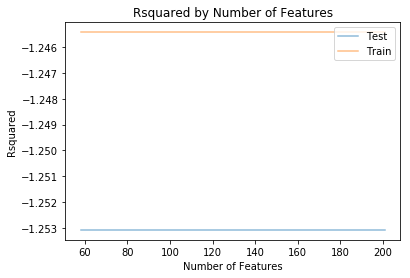

In [317]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [100000,50000,10000]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [319]:
y= df_lis_boston['price']

In [360]:
X= df_lis_boston.drop(columns='price')

In [361]:
X[['weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']]=X[['weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']].replace('[\$,]', '', regex=True).astype(float)

In [362]:
y=y.replace('[\$,]', '', regex=True).astype(float)

In [363]:
X.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,NaN,NaN,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Ro

In [364]:
y

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
5        75.0
6       100.0
7        75.0
8        58.0
9       229.0
10       60.0
11       57.0
12       93.0
13      150.0
14      145.0
15       60.0
16      165.0
17       75.0
18       49.0
19       49.0
20       40.0
21      120.0
22       70.0
23      150.0
24      175.0
25       95.0
26       90.0
27       95.0
28      100.0
29       67.0
        ...  
3555     39.0
3556     69.0
3557     60.0
3558    195.0
3559    229.0
3560    249.0
3561     72.0
3562    179.0
3563    199.0
3564     75.0
3565    146.0
3566     85.0
3567    259.0
3568     69.0
3569    200.0
3570     72.0
3571     89.0
3572    459.0
3573     65.0
3574     68.0
3575     69.0
3576    124.0
3577    150.0
3578     85.0
3579    100.0
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

In [375]:
for k, v in X[X_cat_col].nunique().to_dict().items():
    print('{}={}'.format(k,v))
    if v>500:
        X=X.drop(columns=k)

listing_url=3585
last_scraped=1
name=3504
summary=3113
space=2268
description=3423
experiences_offered=1
neighborhood_overview=1728
notes=1269
transit=1859
access=1762
interaction=1617
house_rules=1928
thumbnail_url=2986
medium_url=2986
picture_url=3585
xl_picture_url=2986
host_url=2181
host_name=1334
host_since=1281
host_location=176
host_about=1240
host_response_time=4
host_response_rate=52
host_acceptance_rate=72
host_is_superhost=2
host_thumbnail_url=2174
host_picture_url=2174
host_neighbourhood=53
host_verifications=83
host_has_profile_pic=2
host_identity_verified=2
street=1239
neighbourhood=30
neighbourhood_cleansed=25
city=38
state=1
zipcode=43
market=4
smart_location=39
country_code=1
country=1
is_location_exact=2
property_type=13
room_type=3
bed_type=5
amenities=3092
calendar_updated=38
calendar_last_scraped=1
first_review=975
last_review=404
requires_license=1
instant_bookable=2
cancellation_policy=4
require_guest_profile_picture=2
require_guest_phone_verification=2


In [376]:
X.shape

(3585, 70)

In [377]:
X.head()

,id,scrape_id,last_scraped,experiences_offered,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,20160906204935,2016-09-07,none,31303940,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,NaN,NaN,NaN,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,20160906204935,2016-09-07,none,2572247,"Boston, Massachusetts, United States",within an hour,100%,100%,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,400.0,NaN,95.0,10.0,0,0.0,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,20160906204935,2016-09-07,none,16701,"Boston, Massachusetts, United States",within a few hours,100%,88%,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,395.0,1350.0,NaN,NaN,1,20.0,3,45,5 days ago,NaN,19,46,61,319,2016-09-06,41,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,20160906204935,2016-09-07,none,6031442,"Boston, Massachusetts, United States",within a few hours,100%,50%,f,NaN,1,1,"['email', 'phone', 'reviews']",t,f,NaN,Roslindale,NaN,Boston,MA,NaN,Boston,"Boston, MA",US,United States,42.281106,-71.121021,f,House,Private room,4,1.0,1.0,2.0,Real Bed,NaN,NaN,NaN,100.0,50.0,2,25.0,1,1125,a week ago,NaN,6,16,26,98,2016-09-06,1,2016-08-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,20160906204935,2016-09-07,none,15396970,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.284512,-71.136258,t,House,Private room,2,1.5,1.0,2.0,Real Bed,NaN,NaN,NaN,NaN,15.0,1,0.0,2,31,2 weeks ago,NaN,13,34,59,334,2016-09-06,29,2016-09-01,99.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [386]:
X['host_response_rate']= X['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [387]:
X['host_acceptance_rate']= X['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

In [388]:
X.head()

,id,scrape_id,last_scraped,experiences_offered,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,20160906204935,2016-09-07,none,31303940,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,NaN,NaN,NaN,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,20160906204935,2016-09-07,none,2572247,"Boston, Massachusetts, United States",within an hour,1.0,1.00,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,400.0,NaN,95.0,10.0,0,0.0,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,20160906204935,2016-09-07,none,16701,"Boston, Massachusetts, United States",within a few hours,1.0,0.88,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,395.0,1350.0,NaN,NaN,1,20.0,3,45,5 days ago,NaN,19,46,61,319,2016-09-06,41,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,20160906204935,2016-09-07,none,6031442,"Boston, Massachusetts, United States",within a few hours,1.0,0.50,f,NaN,1,1,"['email', 'phone', 'reviews']",t,f,NaN,Roslindale,NaN,Boston,MA,NaN,Boston,"Boston, MA",US,United States,42.281106,-71.121021,f,House,Private room,4,1.0,1.0,2.0,Real Bed,NaN,NaN,NaN,100.0,50.0,2,25.0,1,1125,a week ago,NaN,6,16,26,98,2016-09-06,1,2016-08-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,20160906204935,2016-09-07,none,15396970,"Boston, Massachusetts, United States",within an hour,1.0,1.00,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.284512,-71.136258,t,House,Private room,2,1.5,1.0,2.0,Real Bed,NaN,NaN,NaN,NaN,15.0,1,0.0,2,31,2 weeks ago,NaN,13,34,59,334,2016-09-06,29,2016-09-01,99.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [400]:
for k, v in X[X_cat_col].nunique().to_dict().items():
    print('{}={}'.format(k,v))

experiences_offered=1
host_location=176
host_response_time=4
host_is_superhost=2
host_neighbourhood=53
host_verifications=83
host_has_profile_pic=2
host_identity_verified=2
neighbourhood=30
neighbourhood_cleansed=25
city=38
state=1
zipcode=43
market=4
smart_location=39
country_code=1
country=1
is_location_exact=2
property_type=13
room_type=3
bed_type=5
calendar_updated=38
calendar_last_scraped=1
requires_license=1
instant_bookable=2
cancellation_policy=4
require_guest_profile_picture=2
require_guest_phone_verification=2


In [394]:
X_cat_col = X.select_dtypes(include='object').columns

In [395]:
X[X_cat_col]

,last_scraped,experiences_offered,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,calendar_updated,calendar_last_scraped,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2016-09-07,none,"Boston, Massachusetts, United States",NaN,f,Roslindale,"['email', 'phone', 'facebook', 'reviews']",t,f,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Entire home/apt,Real Bed,2 weeks ago,2016-09-06,NaN,f,f,moderate,f,f
1,2016-09-07,none,"Boston, Massachusetts, United States",within an hour,f,Roslindale,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Private room,Real Bed,a week ago,2016-09-06,2016-08-13,f,t,moderate,f,f
2,2016-09-07,none,"Boston, Massachusetts, United States",within a few hours,t,Roslindale,"['email', 'phone', 'reviews', 'jumio']",t,t,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Private room,Real Bed,5 days ago,2016-09-06,2016-08-05,f,f,moderate,t,f
3,2016-09-07,none,"Boston, Massachusetts, United States",within a few hours,f,NaN,"['email', 'phone', 'reviews']",t,f,NaN,Roslindale,Boston,MA,NaN,Boston,"Boston, MA",US,United States,f,House,Private room,Real Bed,a week ago,2016-09-06,2016-08-28,f,f,moderate,f,f
4,2016-09-07,none,"Boston, Massachusetts, United States",within an hour,t,Roslindale,"['email', 'phone', 'reviews', 'kba']",t,t,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Private room,Real Bed,2 weeks ago,2016-09-06,2016-09-01,f,f,flexible,f,f
5,2016-09-07,none,"Boston, Massachusetts, United States",within a few hours,t,Roslindale,"['email', 'phone', 'reviews', 'kba']",t,t,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Condominium,Private room,Real Bed,2 weeks ago,2016-09-06,2016-08-28,f,f,flexible,f,f
6,2016-09-07,none,"Milton, Massachusetts, United States",within an hour,f,Roslindale,"['email', 'phone', 'reviews', 'jumio', 'kba']",t,t,NaN,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,f,Apartment,Entire home/apt,Real Bed,3 days ago,2016-09-06,2016-09-01,f,f,strict,f,f
7,2016-09-07,none,"Boston, Massachusetts, United States",within a few hours,t,Roslindale,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Private room,Real Bed,yesterday,2016-09-06,2016-09-04,f,f,moderate,t,t
8,2016-09-07,none,"Boston, Massachusetts, United States",within an hour,t,Roslindale,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Roslindale,Roslindale,Roslindale,MA,02131,Boston,"Roslindale, MA",US,United States,t,Condominium,Private room,Real Bed,today,2016-09-06,2016-08-30,f,f,moderate,f,f
9,2016-09-07,none,"Boston, Massachusetts, United States",within an hour,t,Roslindale,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Entire home/apt,Real Bed,today,2016-09-06,2016-05-27,f,f,strict,f,f


In [397]:
X = X.drop(columns=['last_scraped','last_review'])

In [399]:
X_cat_col = X.select_dtypes(include='object').columns
X[X_cat_col]

,experiences_offered,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,calendar_updated,calendar_last_scraped,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,none,"Boston, Massachusetts, United States",NaN,f,Roslindale,"['email', 'phone', 'facebook', 'reviews']",t,f,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Entire home/apt,Real Bed,2 weeks ago,2016-09-06,f,f,moderate,f,f
1,none,"Boston, Massachusetts, United States",within an hour,f,Roslindale,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Private room,Real Bed,a week ago,2016-09-06,f,t,moderate,f,f
2,none,"Boston, Massachusetts, United States",within a few hours,t,Roslindale,"['email', 'phone', 'reviews', 'jumio']",t,t,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Private room,Real Bed,5 days ago,2016-09-06,f,f,moderate,t,f
3,none,"Boston, Massachusetts, United States",within a few hours,f,NaN,"['email', 'phone', 'reviews']",t,f,NaN,Roslindale,Boston,MA,NaN,Boston,"Boston, MA",US,United States,f,House,Private room,Real Bed,a week ago,2016-09-06,f,f,moderate,f,f
4,none,"Boston, Massachusetts, United States",within an hour,t,Roslindale,"['email', 'phone', 'reviews', 'kba']",t,t,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Private room,Real Bed,2 weeks ago,2016-09-06,f,f,flexible,f,f
5,none,"Boston, Massachusetts, United States",within a few hours,t,Roslindale,"['email', 'phone', 'reviews', 'kba']",t,t,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Condominium,Private room,Real Bed,2 weeks ago,2016-09-06,f,f,flexible,f,f
6,none,"Milton, Massachusetts, United States",within an hour,f,Roslindale,"['email', 'phone', 'reviews', 'jumio', 'kba']",t,t,NaN,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,f,Apartment,Entire home/apt,Real Bed,3 days ago,2016-09-06,f,f,strict,f,f
7,none,"Boston, Massachusetts, United States",within a few hours,t,Roslindale,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Private room,Real Bed,yesterday,2016-09-06,f,f,moderate,t,t
8,none,"Boston, Massachusetts, United States",within an hour,t,Roslindale,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Roslindale,Roslindale,Roslindale,MA,02131,Boston,"Roslindale, MA",US,United States,t,Condominium,Private room,Real Bed,today,2016-09-06,f,f,moderate,f,f
9,none,"Boston, Massachusetts, United States",within an hour,t,Roslindale,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Entire home/apt,Real Bed,today,2016-09-06,f,f,strict,f,f


In [402]:
X.head()

,id,scrape_id,experiences_offered,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,20160906204935,none,31303940,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,NaN,NaN,NaN,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,20160906204935,none,2572247,"Boston, Massachusetts, United States",within an hour,1.0,1.00,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,400.0,NaN,95.0,10.0,0,0.0,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,20160906204935,none,16701,"Boston, Massachusetts, United States",within a few hours,1.0,0.88,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,395.0,1350.0,NaN,NaN,1,20.0,3,45,5 days ago,NaN,19,46,61,319,2016-09-06,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,20160906204935,none,6031442,"Boston, Massachusetts, United States",within a few hours,1.0,0.50,f,NaN,1,1,"['email', 'phone', 'reviews']",t,f,NaN,Roslindale,NaN,Boston,MA,NaN,Boston,"Boston, MA",US,United States,42.281106,-71.121021,f,House,Private room,4,1.0,1.0,2.0,Real Bed,NaN,NaN,NaN,100.0,50.0,2,25.0,1,1125,a week ago,NaN,6,16,26,98,2016-09-06,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,20160906204935,none,15396970,"Boston, Massachusetts, United States",within an hour,1.0,1.00,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.284512,-71.136258,t,House,Private room,2,1.5,1.0,2.0,Real Bed,NaN,NaN,NaN,NaN,15.0,1,0.0,2,31,2 weeks ago,NaN,13,34,59,334,2016-09-06,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [405]:
X = X.drop(columns=['id','scrape_id','host_id'])

In [406]:
X.head()

,experiences_offered,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,none,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,NaN,NaN,NaN,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,none,"Boston, Massachusetts, United States",within an hour,1.0,1.00,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,400.0,NaN,95.0,10.0,0,0.0,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,none,"Boston, Massachusetts, United States",within a few hours,1.0,0.88,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,395.0,1350.0,NaN,NaN,1,20.0,3,45,5 days ago,NaN,19,46,61,319,2016-09-06,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,none,"Boston, Massachusetts, United States",within a few hours,1.0,0.50,f,NaN,1,1,"['email', 'phone', 'reviews']",t,f,NaN,Roslindale,NaN,Boston,MA,NaN,Boston,"Boston, MA",US,United States,42.281106,-71.121021,f,House,Private room,4,1.0,1.0,2.0,Real Bed,NaN,NaN,NaN,100.0,50.0,2,25.0,1,1125,a week ago,NaN,6,16,26,98,2016-09-06,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,none,"Boston, Massachusetts, United States",within an hour,1.0,1.00,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.284512,-71.136258,t,House,Private room,2,1.5,1.0,2.0,Real Bed,NaN,NaN,NaN,NaN,15.0,1,0.0,2,31,2 weeks ago,NaN,13,34,59,334,2016-09-06,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [408]:
X = X.drop(columns='neighbourhood')

In [409]:
X_num_col = X.select_dtypes(exclude='object').columns

In [410]:
X[X_num_col] = X[X_num_col].fillna(X[X_num_col].mean())

In [417]:
import ast

In [422]:
i=[]
for x in X['host_verifications']:
    x = ast.literal_eval(x)
    x = [n.strip() for n in x]
    
    for n in x:
        i.append(n)

In [424]:
unique = pd.DataFrame(data=i)

In [428]:
unique=unique[0].unique()

In [429]:
unique

array(['email', 'phone', 'facebook', 'reviews', 'linkedin', 'amex',
       'jumio', 'kba', 'manual_online', 'manual_offline', 'google',
       'sent_id', 'weibo'], dtype=object)

In [430]:
X = X.drop(columns='host_verifications')

In [441]:
X= X.drop(columns='has_availability')

In [442]:
X.head()

,experiences_offered,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,none,"Boston, Massachusetts, United States",NaN,0.949891,0.841731,f,Roslindale,1,1,t,f,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,858.464286,922.392377,3692.097973,324.698212,35.000000,1,0.0,2,1125,2 weeks ago,0,0,0,0,2016-09-06,0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,f,NaN,NaN,f,moderate,f,f,1,1.970908
1,none,"Boston, Massachusetts, United States",within an hour,1.000000,1.000000,f,Roslindale,1,1,t,t,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,858.464286,400.000000,3692.097973,95.000000,10.000000,0,0.0,2,15,a week ago,26,54,84,359,2016-09-06,36,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,f,NaN,NaN,t,moderate,f,f,1,1.300000
2,none,"Boston, Massachusetts, United States",within a few hours,1.000000,0.880000,t,Roslindale,1,1,t,t,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,858.464286,395.000000,1350.000000,324.698212,68.380145,1,20.0,3,45,5 days ago,19,46,61,319,2016-09-06,41,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,f,NaN,NaN,f,moderate,t,f,1,0.470000
3,none,"Boston, Massachusetts, United States",within a few hours,1.000000,0.500000,f,NaN,1,1,t,f,Roslindale,NaN,Boston,MA,NaN,Boston,"Boston, MA",US,United States,42.281106,-71.121021,f,House,Private room,4,1.0,1.0,2.0,Real Bed,858.464286,922.392377,3692.097973,100.000000,50.000000,2,25.0,1,1125,a week ago,6,16,26,98,2016-09-06,1,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,f,NaN,NaN,f,moderate,f,f,1,1.000000
4,none,"Boston, Massachusetts, United States",within an hour,1.000000,1.000000,t,Roslindale,1,1,t,t,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.284512,-71.136258,t,House,Private room,2,1.5,1.0,2.0,Real Bed,858.464286,922.392377,3692.097973,324.698212,15.000000,1,0.0,2,31,2 weeks ago,13,34,59,334,2016-09-06,29,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,f,NaN,NaN,f,flexible,f,f,1,2.250000


In [443]:
X_cat_col = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, prefix=X_cat_col,dummy_na=False,drop_first=True)

In [444]:
X=X.dropna(how='all',axis=1)

In [481]:
X=X.drop(columns='host_listings_count')

In [482]:
X.shape

(3585, 471)

In [483]:
y.shape

(3585,)

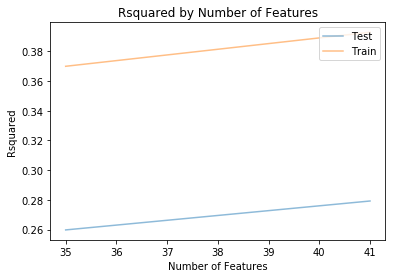

In [505]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [3000, 1200,1100,1000,200,10,0]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X[coef_df.head(41)['est_int'].values], y, cutoffs)


In [506]:
r2_scores_test

[0.2597271302744558,
 0.2792152115498079,
 0.2792152115498079,
 0.2792152115498079,
 0.2792152115498079,
 0.2792152115498079,
 0.2792152115498079]

In [507]:
r2_scores_train

[0.3700038738824658,
 0.39294366749802845,
 0.39294366749802845,
 0.39294366749802845,
 0.39294366749802845,
 0.39294366749802845,
 0.39294366749802845]

In [487]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)[est]

,est_int,coefs,abs_coefs
3,latitude,708.498695,708.498695
39,room_type_Private room,-51.269074,51.269074
40,bed_type_Real Bed,42.269388,42.269388
34,host_has_profile_pic_t,36.126083,36.126083
5,bathrooms,28.501316,28.501316
1,host_acceptance_rate,26.127123,26.127123
6,bedrooms,24.943912,24.943912
36,city_Boston,15.937756,15.937756
37,"smart_location_Boston, MA",15.937756,15.937756
41,cancellation_policy_strict,-15.400053,15.400053


In [491]:
coef_df.head(20)['est_int'].values

array(['latitude', 'room_type_Private room', 'bed_type_Real Bed',
       'host_has_profile_pic_t', 'bathrooms', 'host_acceptance_rate',
       'bedrooms', 'city_Boston', 'smart_location_Boston, MA',
       'cancellation_policy_strict', 'accommodates',
       'host_identity_verified_t', 'review_scores_value',
       'host_response_time_within an hour',
       'host_location_Boston, Massachusetts, United States',
       'review_scores_location', 'review_scores_cleanliness',
       'reviews_per_month', 'review_scores_accuracy', 'beds'],
      dtype=object)

In [ ]:
---

In [512]:
df_3 = df_lis_boston.copy()

In [513]:
df_3.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [530]:
df_3['price_float']=df_3['price'].replace('[\$,]', '', regex=True).astype(float)

In [531]:
availability = df_3.groupby('neighbourhood_cleansed')[['availability_30','availability_60','availability_90','availability_365','price_float']].mean()

In [532]:
availability['availability_30_rate'] =availability['availability_30']/30

In [533]:
availability['availability_60_rate'] =availability['availability_60']/60

In [534]:
availability['availability_90_rate'] =availability['availability_90']/90

In [535]:
availability['availability_365_rate'] =availability['availability_365']/365

In [536]:
availability

,availability_30,availability_60,availability_90,availability_365,price_float,availability_30_rate,availability_60_rate,availability_90_rate,availability_365_rate
neighbourhood_cleansed,,,,,,,,,
Allston,6.203846,15.669231,27.915385,131.896154,112.307692,0.206795,0.261154,0.310171,0.361359
Back Bay,9.566225,24.307947,41.569536,188.973510,240.950331,0.318874,0.405132,0.461884,0.517736
Bay Village,10.333333,31.250000,55.291667,238.833333,266.833333,0.344444,0.520833,0.614352,0.654338
Beacon Hill,5.025773,14.412371,27.664948,163.675258,224.443299,0.167526,0.240206,0.307388,0.448425
Brighton,7.913514,19.897297,35.135135,168.643243,118.767568,0.263784,0.331622,0.390390,0.462036
Charlestown,8.828829,22.720721,40.207207,191.639640,198.045045,0.294294,0.378679,0.446747,0.525040
Chinatown,17.732394,40.098592,64.253521,183.619718,232.352113,0.591080,0.668310,0.713928,0.503068
Dorchester,8.665428,24.836431,44.910781,236.382900,91.639405,0.288848,0.413941,0.499009,0.647624
Downtown,9.052326,22.313953,40.156977,181.180233,236.459302,0.301744,0.371899,0.446189,0.496384


In [537]:
availability.sort_values('availability_30_rate')

,availability_30,availability_60,availability_90,availability_365,price_float,availability_30_rate,availability_60_rate,availability_90_rate,availability_365_rate
neighbourhood_cleansed,,,,,,,,,
North End,4.867133,13.041958,26.006993,164.902098,195.678322,0.162238,0.217366,0.288967,0.451787
Beacon Hill,5.025773,14.412371,27.664948,163.675258,224.443299,0.167526,0.240206,0.307388,0.448425
South End,6.104294,17.049080,31.361963,165.861963,204.349693,0.203476,0.284151,0.348466,0.454416
Allston,6.203846,15.669231,27.915385,131.896154,112.307692,0.206795,0.261154,0.310171,0.361359
Jamaica Plain,6.620991,17.548105,33.195335,180.005831,138.478134,0.220700,0.292468,0.368837,0.493167
Mission Hill,7.080645,16.475806,30.193548,130.145161,121.967742,0.236022,0.274597,0.335484,0.356562
Brighton,7.913514,19.897297,35.135135,168.643243,118.767568,0.263784,0.331622,0.390390,0.462036
South Boston,7.954023,20.971264,38.373563,189.545977,187.609195,0.265134,0.349521,0.426373,0.519304
Dorchester,8.665428,24.836431,44.910781,236.382900,91.639405,0.288848,0.413941,0.499009,0.647624
